In [12]:
#imports
import os
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#lineary interpolate the start and end coordinates for the neuromast to normalize to (in pixels)
z_values = np.linspace(78, 106, 120)
y_values = np.linspace(572, 289, 120)
x_values = np.linspace(147, 153, 120)

#convert to pixels
z_values = z_values * 0.325
y_values = y_values * 0.325
x_values = x_values * 0.325


#list of superficial cell IDs
Superficial_cells = [2, 3, 4, 5, 7, 9, 10, 12, 13, 18, 19, 20, 28, 29, 30, 36, 37, 38, 41, 45, 49, 51, 55, 59, 60, 80, 85, 87, 91, 96, 99, 100, 101, 103, 110, 121, 122, 128, 131, 134, 135, 136, 138, 139, 159, 160, 161]

#list of neuromast cell IDs
Neuromast_cells = [8, 14, 16, 17, 24, 27, 31, 35, 40, 42, 43, 44, 47, 48, 52, 53, 56, 57, 58, 61, 64, 67, 68, 72, 73, 76, 78, 79, 81, 82, 83, 86, 88, 89, 90, 92, 93, 95, 97, 98, 102, 105, 106, 108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 120, 123, 125, 126, 127, 129, 130, 132, 133, 141, 143, 144, 147, 152, 153, 154, 156, 157, 158]

#define some functions
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [7]:
#load the raw data


df_superficial = pd.read_csv("df_superficial_raw.csv") 
df_neuromast = pd.read_csv("df_neuromast_raw.csv") 

In [8]:
#normalize the values to the neuromast values

#normalize z values
df_superficial.iloc[:,2] = df_superficial.iloc[:,2]  - df_superficial.iloc[:,4]
df_neuromast.iloc[:,2] = df_neuromast.iloc[:,2]  - df_neuromast.iloc[:,4]


#normalize x values
df_superficial.iloc[:,3] = df_superficial.iloc[:,3]  - df_superficial.iloc[:,5]
df_neuromast.iloc[:,3] = df_neuromast.iloc[:,3]  - df_neuromast.iloc[:,5]

#re-calculate neuromast position at (0,0)
df_superficial.iloc[:,4] = df_superficial.iloc[:,4]  - df_superficial.iloc[:,4]
df_superficial.iloc[:,5] = df_superficial.iloc[:,5]  - df_superficial.iloc[:,5]


#rotate the dataframe around the 0,0 coordinate
origin = (0,0)

zpos_neuromast_rotated = []


zpos_neuromast = df_neuromast.iloc[:, 2]
xpos_neuromast = df_neuromast.iloc[:, 3]
zpos_superficial = df_superficial.iloc[:, 2]
xpos_superficial = df_superficial.iloc[:, 3]

rotated_z_superficial = []
rotated_x_superficial = []

rotated_z_neuromast = []
rotated_x_neuromast = []




#rotate the superficial cells by 10 degrees (estimate of needed rotation)
for zpos, xpos in zip(zpos_superficial, xpos_superficial):
    point = (zpos, xpos)
    rotz, rotx = rotate(origin, point, math.radians(-10))
    rotated_z_superficial.append(rotz)
    rotated_x_superficial.append(rotx)

#rotate the neuromast cells by 10 degrees (estimate of needed rotation)  
for zpos, xpos in zip(zpos_neuromast, xpos_neuromast):
    point = (zpos, xpos)
    rotz, rotx = rotate(origin, point, math.radians(-10))
    rotated_z_neuromast.append(rotz)
    rotated_x_neuromast.append(rotx)

#update the dataframes
df_superficial.iloc[:, 2] = rotated_z_superficial
df_superficial.iloc[:, 3] = rotated_x_superficial
df_neuromast.iloc[:, 2] = rotated_z_neuromast
df_neuromast.iloc[:, 3] = rotated_x_neuromast
    


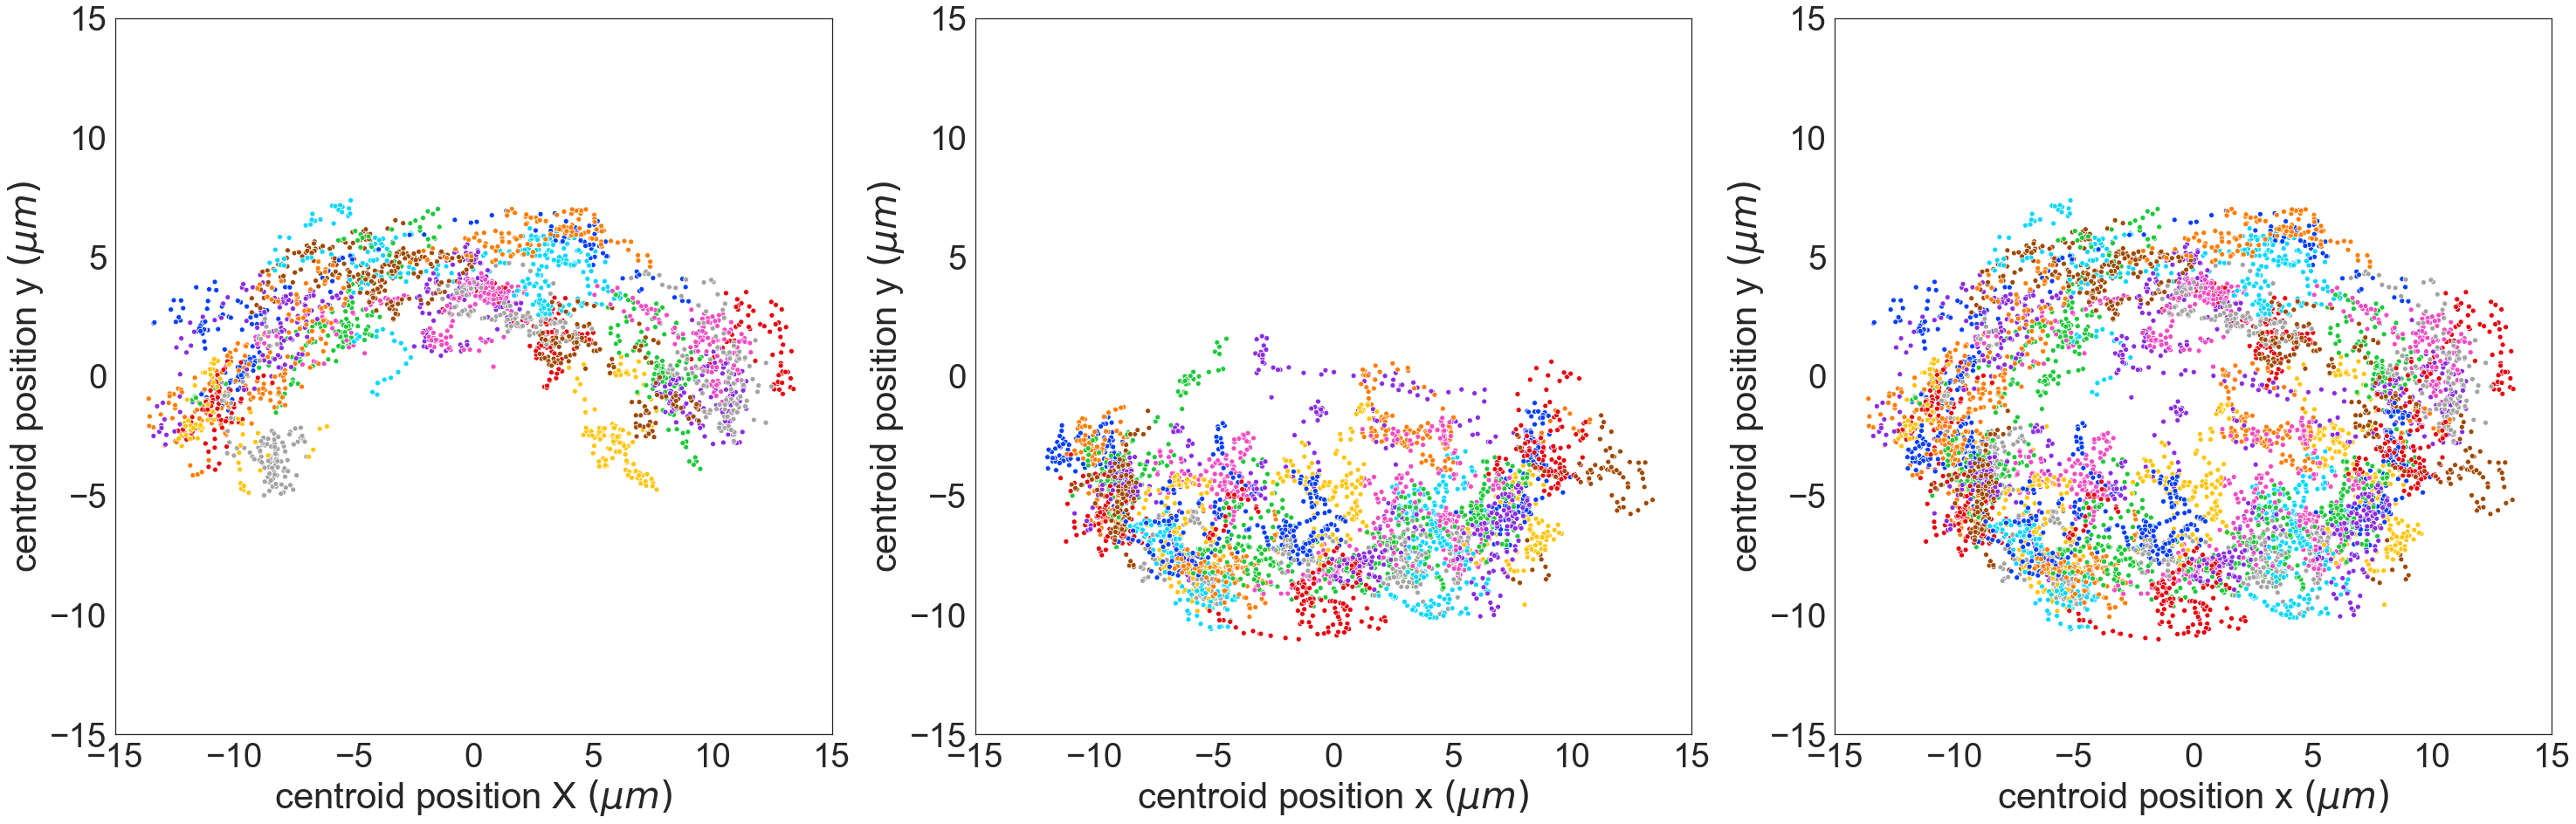

In [15]:
#make individual track plots 


#define color palettes of the appropriate size
neuromast_palette = sns.color_palette(sns.color_palette("bright", 39))
superficial_palette = sns.color_palette(sns.color_palette("bright", 30))


sns.set(font_scale = 3.5)
sns.set_style("white")

f, ax = plt.subplots(1,3, figsize=(50,100))
#f, ax = plt.subplots(1,3)


#sns.kdeplot(normalized_z_sheath_rot, normalized_x_sheath_rot,
#                cmap="RdPu", shade=True, shade_lowest=False, bw=.5, ax=ax[0], alpha = 1)


sns.scatterplot(df_superficial['z'], df_superficial['x'],
               ax=ax[0], alpha = 1, hue=df_superficial['cell'], palette = superficial_palette)


sns.scatterplot(df_neuromast['z'], df_neuromast['x'],
               ax=ax[1], alpha = 1, hue=df_neuromast['cell'], palette = neuromast_palette)



sns.scatterplot(df_superficial['z'], df_superficial['x'],
               ax=ax[2], alpha = 1, hue=df_superficial['cell'], palette = superficial_palette)


sns.scatterplot(df_neuromast['z'], df_neuromast['x'],
               ax=ax[2], alpha = 1, hue=df_neuromast['cell'], palette = neuromast_palette)




ax[0].set_ylim(-15,15)
ax[0].set_xlim(-15,15)

ax[1].set_ylim(-15,15)
ax[1].set_xlim(-15,15)

ax[2].set_ylim(-15,15)
ax[2].set_xlim(-15,15)

ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
ax[2].set_aspect('equal', adjustable='box')

ax[0].set_xlabel('centroid position X $(\mu m)$')
ax[0].set_ylabel('centroid position y $(\mu m)$')

ax[1].set_xlabel('centroid position x $(\mu m)$')
ax[1].set_ylabel('centroid position y $(\mu m)$')

ax[2].set_xlabel('centroid position x $(\mu m)$')
ax[2].set_ylabel('centroid position y $(\mu m)$')

#turn off the legend
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()


plt.show()

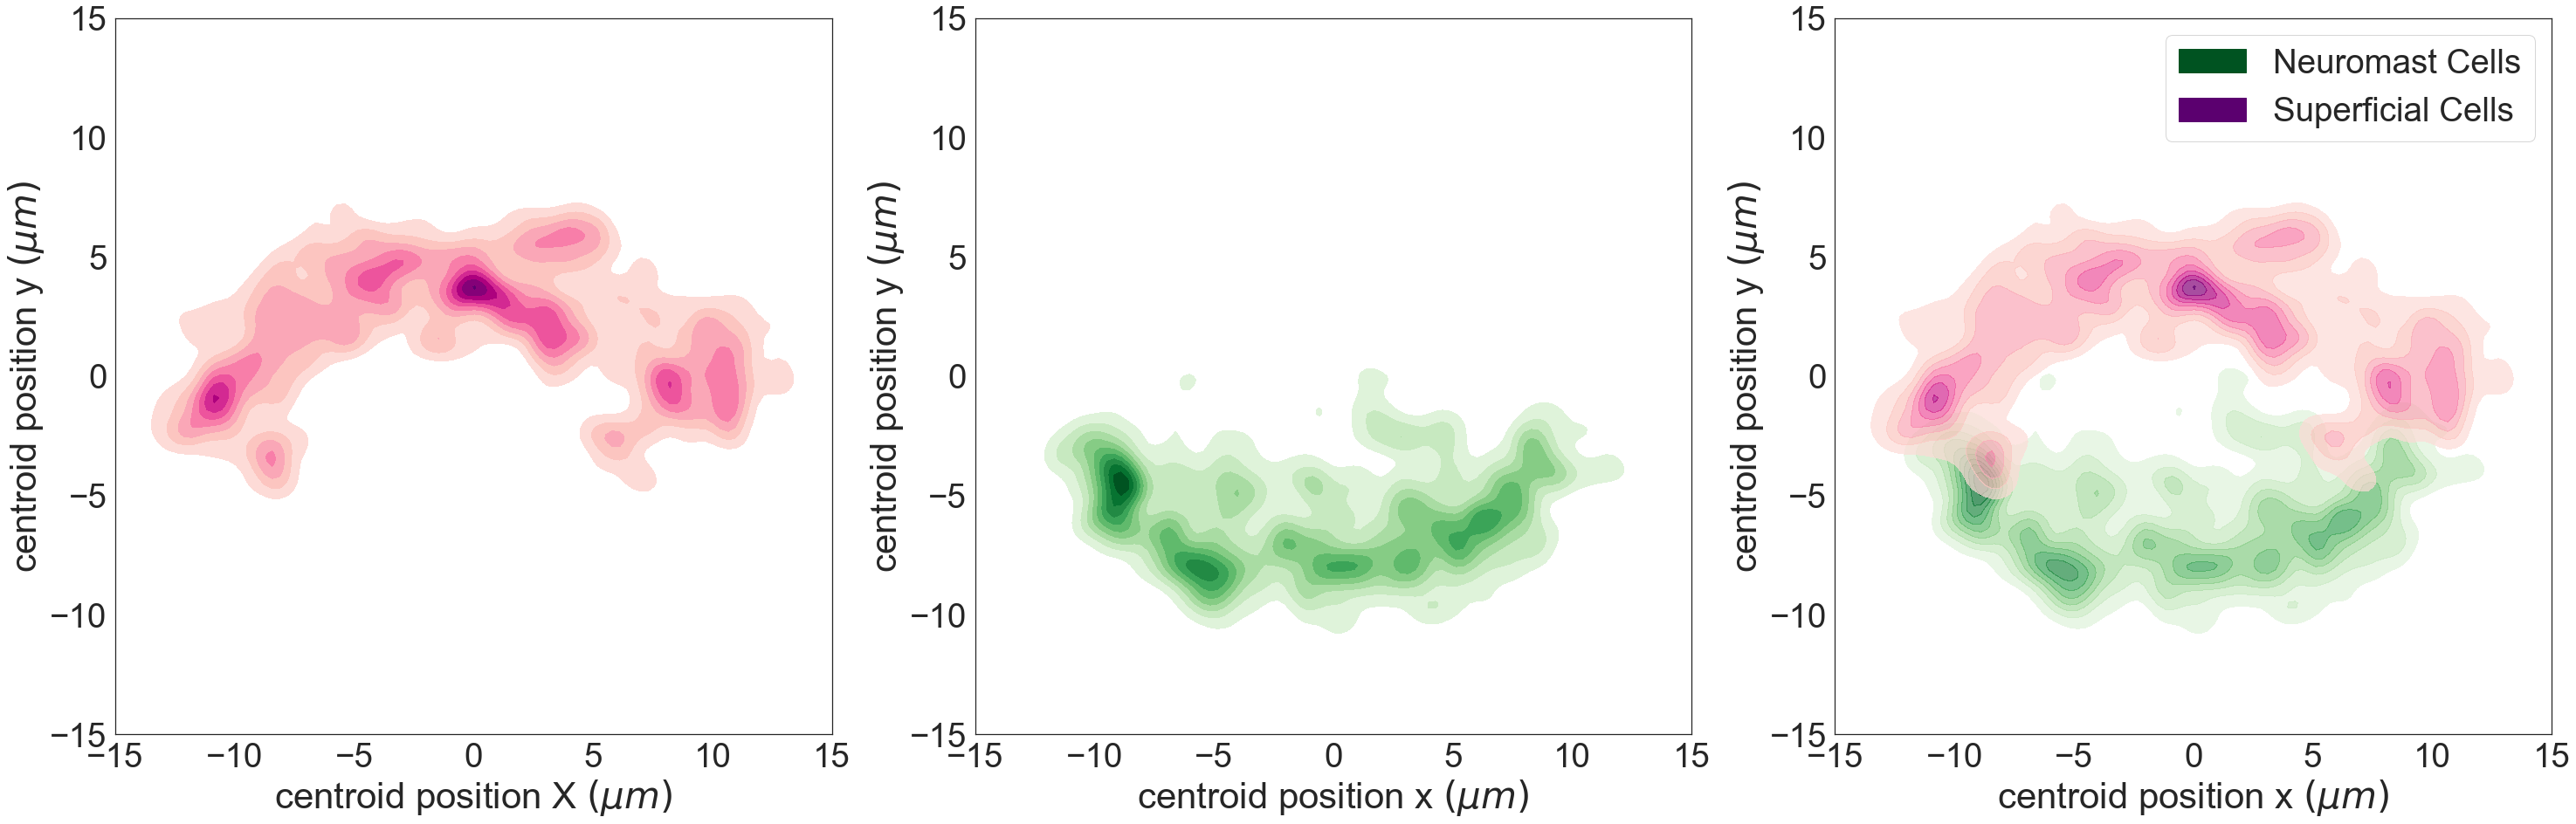

In [13]:
#make a heatmap

sns.set(font_scale = 3.5)
sns.set_style("white")

f, ax = plt.subplots(1,3, figsize=(50,100))


sns.kdeplot(df_superficial['z'], df_superficial['x'],
                cmap="RdPu", shade=True, shade_lowest=False, bw=.5, ax=ax[0], alpha = 1)


sns.kdeplot(df_neuromast['z'], df_neuromast['x'],
                cmap="Greens", shade=True, shade_lowest=False, bw=.5, ax=ax[1], alpha = 1)




sns.kdeplot(df_neuromast['z'], df_neuromast['x'],
                cmap="Greens", shade=True, shade_lowest=False, bw=.5, ax=ax[2], alpha=.7, label="Neuromast Cells")
sns.kdeplot(df_superficial['z'], df_superficial['x'],
                cmap="RdPu", shade=True, shade_lowest=False, bw=.5, ax=ax[2], alpha=.7, label="Superficial Cells")


ax[0].set_ylim(-15,15)
ax[0].set_xlim(-15,15)

ax[1].set_ylim(-15,15)
ax[1].set_xlim(-15,15)

ax[2].set_ylim(-15,15)
ax[2].set_xlim(-15,15)

ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
ax[2].set_aspect('equal', adjustable='box')

ax[0].set_xlabel('centroid position X $(\mu m)$')
ax[0].set_ylabel('centroid position y $(\mu m)$')

ax[1].set_xlabel('centroid position x $(\mu m)$')
ax[1].set_ylabel('centroid position y $(\mu m)$')

ax[2].set_xlabel('centroid position x $(\mu m)$')
ax[2].set_ylabel('centroid position y $(\mu m)$')

ax[2].legend()

plt.show()